# Simple orders analysis

🚀 We are finally ready to start analysing our `orders` dataset!

Our objective is to get an initial understanding of:
- `orders` properties
- their associated `review_scores`

In [1]:
# Import Modules 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)

In [11]:
# Check your shape below

# Shape if you set with_distance_seller_customer=True
# if orders.shape[1] == 13: 
#     assert(orders.shape == (95872, 13))

# Shape if you set with_distance_seller_customer=False    
# else:  
assert(orders.shape == (96353, 12))

## 1 - Inspect features

👉 Print summary statistics of each column of the order dataset (then focus in particular on `wait_time`)

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96353 entries, 0 to 96360
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            96353 non-null  object 
 1   wait_time           96353 non-null  float64
 2   expected_wait_time  96353 non-null  float64
 3   delay_vs_expected   96353 non-null  float64
 4   order_status        96353 non-null  object 
 5   dim_is_five_star    96353 non-null  int64  
 6   dim_is_one_star     96353 non-null  int64  
 7   review_score        96353 non-null  int64  
 8   number_of_products  96353 non-null  int64  
 9   number_of_sellers   96353 non-null  int64  
 10  price               96353 non-null  float64
 11  freight_value       96353 non-null  float64
dtypes: float64(5), int64(5), object(2)
memory usage: 9.6+ MB


In [53]:
filtered = orders.filter(items=['wait_time','expected_wait_time','delay_vs_expected','dim_is_five_star','dim_is_one_star',\
                               'review_score','number_of_products','number_of_sellers','price','freight_value'])
filtered

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,8.0,15.0,0.0,0,0,4,1,1,29.99,8.72
1,13.0,19.0,0.0,0,0,4,1,1,118.70,22.76
2,9.0,26.0,0.0,1,0,5,1,1,159.90,19.22
3,13.0,26.0,0.0,1,0,5,1,1,45.00,27.20
4,2.0,12.0,0.0,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...
96356,8.0,18.0,0.0,1,0,5,1,1,72.00,13.08
96357,22.0,23.0,0.0,0,0,4,1,1,174.90,20.10
96358,24.0,30.0,0.0,1,0,5,1,1,205.99,65.02
96359,17.0,37.0,0.0,0,0,2,2,1,359.98,81.18


📈 Plot histograms to get a sense of the distribution of each numerical feature.

In [123]:
orders.select_dtypes(exclude='object').columns

Index(['wait_time', 'expected_wait_time', 'delay_vs_expected',
       'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_products', 'number_of_sellers', 'price', 'freight_value'],
      dtype='object')

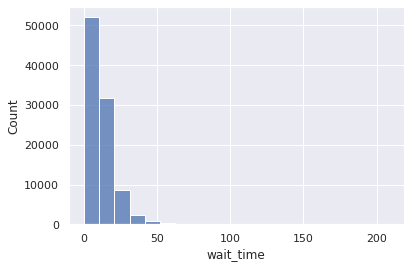

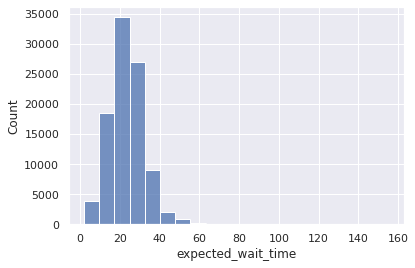

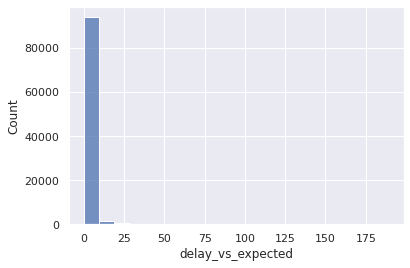

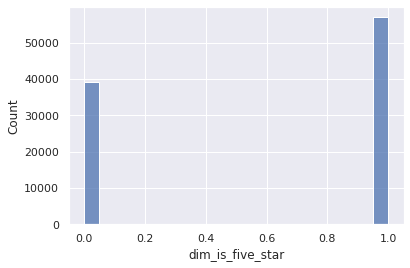

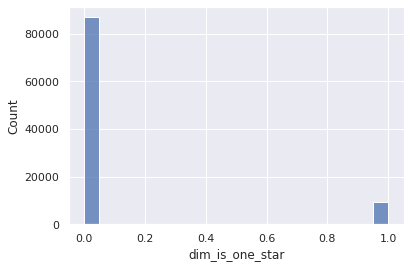

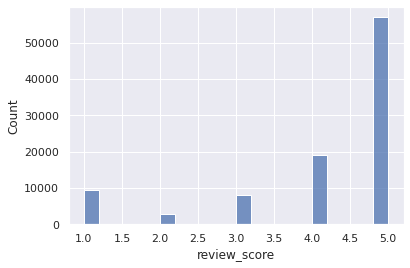

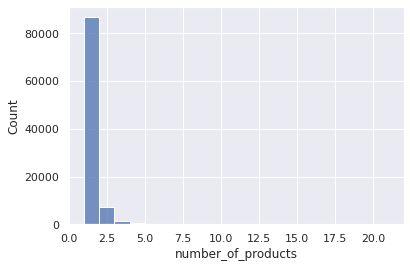

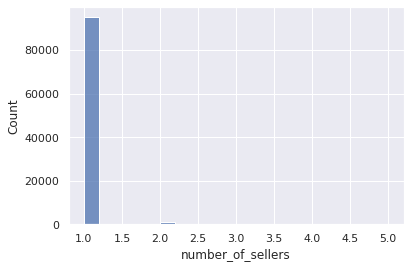

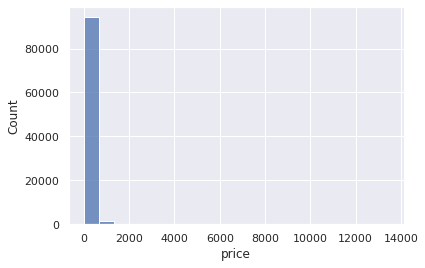

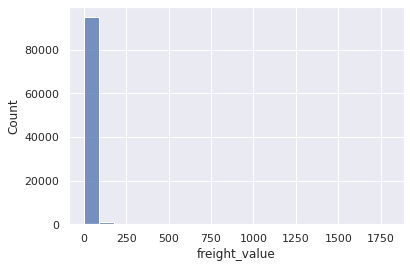

In [128]:
for i in orders.select_dtypes(exclude='object').columns:
    sns.histplot(orders[i],bins=20)
    plt.show()

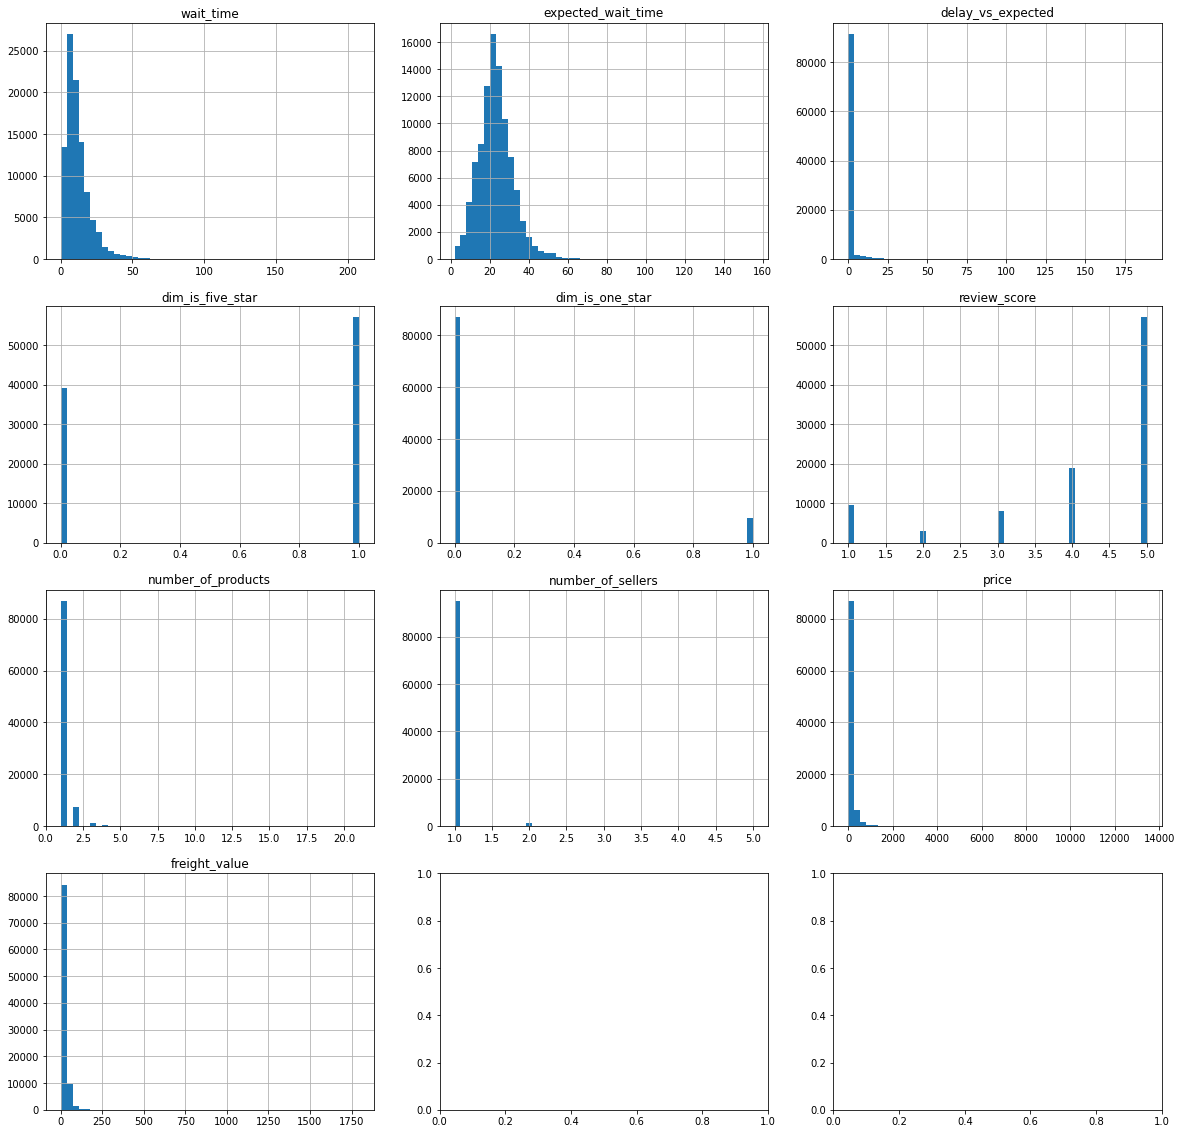

In [63]:
fig, axs = plt.subplots(4,3,figsize=(20,20))
axs = axs.flat

for index, items in enumerate(filtered.columns):
    
    orders[items].hist(ax=axs[index],bins=50)
    axs[index].set_title(items)


👀 In particular, create a `sns.FacetGrid()` of histograms for each `review_score` vs. `wait_time`

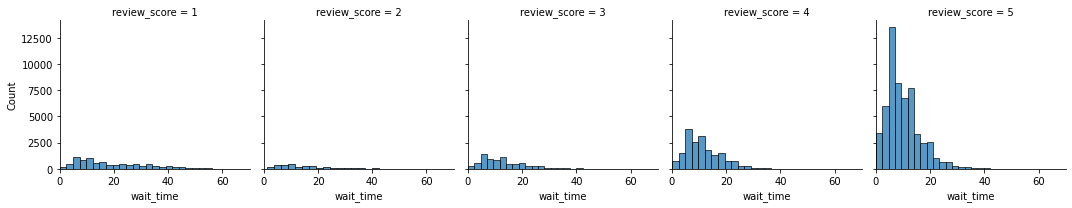

In [31]:
g = sns.FacetGrid(orders,col='review_score', xlim=(0,70))
g.map_dataframe(sns.histplot, x="wait_time",bins=80)

❓ What do you notice for the variables `price` and `freight_value` ? 

❓ Have a look at the  `distance_seller_customer` feature if you have created it in `order.py`

<AxesSubplot:xlabel='price', ylabel='freight_value'>

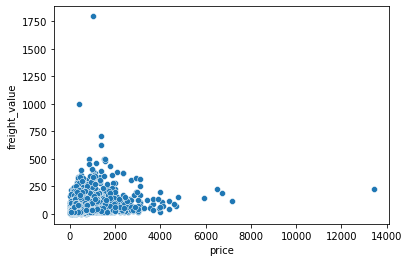

In [32]:
sns.scatterplot(x=orders['price'],y=orders['freight_value'])

❓Inspect the various correlations between features: which feature seems to the most correlated with `review_score`?

<details>
    <summary>▸ Hint</summary>

* Use `DataFrame.corr()` combined with `sns.heatmap()` and `cmap='coolwarm'`
* Have a look at the absolute values of the correlation coefficients of `review_score` vs. each feature,
    * the higher the coefficient, the more one given feature is correlated (positively or negatively) with the `review_score`

</details>

In [58]:
filtered.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
wait_time,1.000000,0.384691,0.701272,-0.233594,0.305562,-0.333616,-0.019932,-0.040906,0.055057,0.167160
expected_wait_time,0.384691,1.000000,0.005978,-0.050270,0.034616,-0.052304,0.015701,0.024935,0.076872,0.239141
delay_vs_expected,0.701272,0.005978,1.000000,-0.155674,0.283587,-0.270909,-0.013602,-0.017055,0.016427,0.024042
dim_is_five_star,-0.233594,-0.050270,-0.155674,1.000000,-0.396322,0.791787,-0.072527,-0.070409,-0.012929,-0.058843
dim_is_one_star,0.305562,0.034616,0.283587,-0.396322,1.000000,-0.807700,0.119955,0.102436,0.044792,0.082611
review_score,-0.333616,-0.052304,-0.270909,0.791787,-0.807700,1.000000,-0.123492,-0.116942,-0.034742,-0.090013
number_of_products,-0.019932,0.015701,-0.013602,-0.072527,0.119955,-0.123492,1.000000,0.288560,0.153561,0.438307
number_of_sellers,-0.040906,0.024935,-0.017055,-0.070409,0.102436,-0.116942,0.288560,1.000000,0.043845,0.133658
price,0.055057,0.076872,0.016427,-0.012929,0.044792,-0.034742,0.153561,0.043845,1.000000,0.410038
freight_value,0.167160,0.239141,0.024042,-0.058843,0.082611,-0.090013,0.438307,0.133658,0.410038,1.000000


<AxesSubplot:>

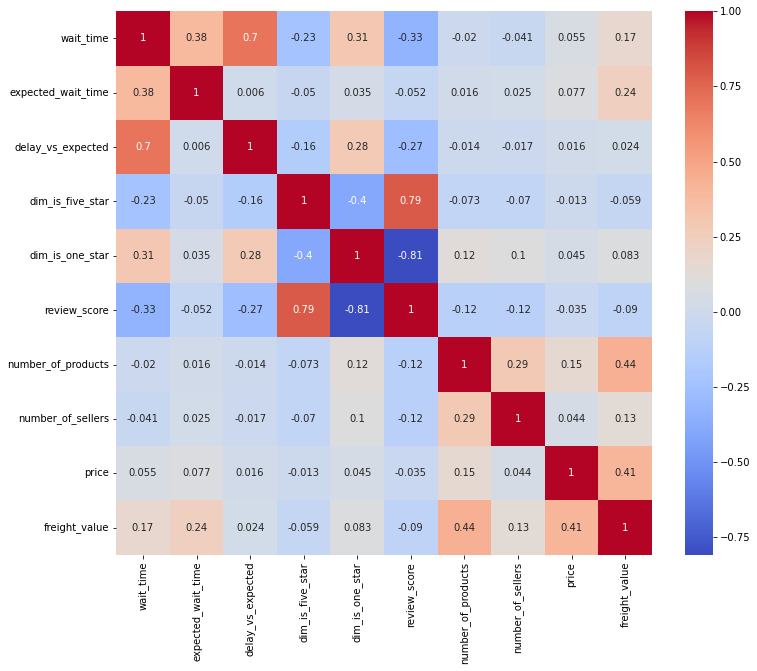

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(orders.corr(), cmap='coolwarm', annot=True)

* 😏 _Captain Obvious :_
    * `review_score` is 100% correlated to itself 
    * and strongly correlated to `dim_is_one_star` and `dim_is_five_star`...
* ⚠️ The two next highest correlation coefficients with respect to the `review_score` are :
    * `wait_time` : - 34 %
    * `delay_vs_expected` : 27 %

## 2 - Simple regression of `review_score` against delivery duration

👉 So, it seems that `review_score` is mostly correlated with `wait_time` (= - 34%) and `delay_vs_expected` (27%).

🎨 Let's investigate these correlations  with `seaborn`

### 2.1 Plots
❓ In one figure, create 2 subplots, that regress `review_score` on `wait_time` and `delay_vs_expected` respectively.

<u>Tips</u>:

- Reduce your dataframe to a random sub-`sample of 10,000 rows` for speed purposes (a good practice in data exploration)
- Use `DataFrame.sample()` with a fixed `random_state` to avoid changing the sample at each execution if needed
- Use `sns.regplot()` to plot the `regression lines`
- Add some `y_jitter` parameters to better visualize the scatterplot density
- Limit `xlim` and `ylim` to hide outliers

In [65]:
data_sample = orders.sample(n=10000,random_state=1)
data_sample.head()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
73763,771c4f1f521f462e4b95619e648aaeab,5.0,20.0,0.0,delivered,0,1,1,2,2,89.00,25.07
22425,86198e40464e410dbb14a4ae8e03ecbc,20.0,36.0,0.0,delivered,0,1,1,1,1,31.90,16.79
64816,1c6ba4e1c9d47c2594130a03f164287c,9.0,14.0,0.0,delivered,1,0,5,1,1,17.00,15.23
41820,726578ea1b027b33080a7a807e97941a,9.0,28.0,0.0,delivered,1,0,5,1,1,99.00,15.44
82760,3a1400b5d4dd3082a4bc8a64d66f6d90,14.0,20.0,0.0,delivered,1,0,5,1,1,49.99,15.23


(0.0, 6.0)

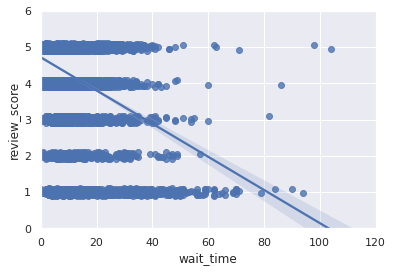

In [111]:
wait_time = sns.regplot(x='wait_time',y='review_score',data=data_sample, y_jitter=0.1)
wait_time.set_xlim(0,120)
wait_time.set_ylim(0,6)

(0.0, 6.0)

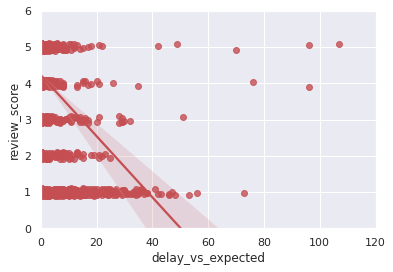

In [112]:
delay_vs_exp = sns.regplot(x='delay_vs_expected',y='review_score',data=data_sample, y_jitter=0.1, color='r')
delay_vs_exp.set_xlim(0,120)
delay_vs_exp.set_ylim(0,6)

ℹ️ What did `regplot` do ? 

👉 It tried to perform a `Linear Regression` of the `review_score` vs. `wait_time` and `delay_vs_exp` <br/> *(Cf. Day 03 - Linear Regression tomorrow)*

🧐 It doesn't look so interpretable, does it ?

👉 You are right: we have only 5  different review scores which can be interpreted as a categorical variable with five different possible values (for example: "very bad", "bad", "average", "good" and "very good") that we are trying to regress against two continuous values that are `wait_time` and `delay_vs_exp`.

👀 However, based on the regression lines, we can see a very intuitive pattern: the longer the waiting time and/or the delay, the lower the review score - Well, not surprising. But how fast does the review score decrease ?


### 2.2 Interpretation

❓Try to visually "compute" the `slope` of each curve. 

✍️ Write down, in plain English, how you would interpret these coefficients if you were to explain it to a non-data-educated audience.

slope of the line indicates how the rate of scores drops when the waiting time increases. 
1. based on slope in graph 1, it shows that every 20 days will reduce a potential rating by 1 star
2. based on slope in graph 2, it shows that every 12.5 days of delay vs expected will reduce the rating by 1 star

<details>
    <summary>▸ Answer</summary>


- `Slope wait_time ≈ -0.05` : "For each additional day waiting for an order to be delivered, the review score on average is reduced by 0.05"
- `Slope delay ≈ -0.1` : "For each additional day waiting for an order to be delivered _after the ETA_, the review score on average is reduced by 0.1"

❓ Are you surprised that the delay seems more impactful than the waiting time ? 
    
👉If yes, think about it twice: you may be impatient to receive your order and would like a small wait time, but you would be even more disappointed to receive your package after the expected delivery date !
        
</details>

### 2.3 Inferential analysis

Even if we had used all 100,000 orders for these regplots, these orders represent 16 months of data after all...

⚠️⚠️⚠️ **How certain** are we that these coefficients are **statistically significant**? ⚠️⚠️⚠️

⚡️ <u> Questions about the statistical significance of these coefficients: </u>

* Are these coefficients able to generalize well to future orders (all else being equal) ? (*Ideal answer: Yes*) 
* Are we sure that these coefficients do not simply capture random fluctuations due to the limited observation period ? (*Ideal answer: No*) 

🧐 We need to estimate the **`confidence interval`** around the mean value for these two slopes  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

⭐️ Fortunately, `Seaborn` already computes this 95% confidence interval for us with a shaded blue cone around the regression line!

❓Use `Seaborn` `regplot` to visualize the two confidence intervals:
- Change the `size of your sample dataset`: 
    - Notice how the slope may change as the sample size becomes smaller. 
    - What about the confidence interval?
- Change the `size of the confidence interval` by playing with the regplot parameter called `ci` (95% by default)

In [ ]:
delay_vs_exp = sns.regplot(x='delay_vs_expected',y='review_score',data=data_sample, y_jitter=0.1, color='r')
delay_vs_exp.set_xlim(0,120)
delay_vs_exp.set_ylim(0,6)

🔎 Interpretation:

* **Null Hypothesis** $H_0$ : "this variable does not influence the review score", a.k.a its coefficient is equal to zero

When plotting all our datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
    - 👉 We are `95% confident that slower deliveries are associated with weaker reviews`.
- The **`p-value`** associated with the null hypothesis "the delivery time is almost zero" is lower than 5%
    - 👉 We can safely reject this null hypothesis and consider the **`alternative hypothesis`** = `"the delivery time has an impact on the review score"` 

🔥 Our findings are said to be **statistically significant**. 

⚠️ However, **correlation does NOT imply causality**. 

- It can be inherently slower to deliver certain products (e.g.heavy products)
    - These categories of products will often have a low review_score, not matter how long their delivery time is. 

👉 Identifying **confounding factor** is crucial and cannot be done with a simple univariate regression. 

🗓 Cf. `Lecture 3 - Linear Regression` : we will talk about **`multivariate linear regression`**. 
</details>



---
🏁 Congratulations! 

🙏 Don't forget to `commit` and `push` your notebook